# Marketing Research Questions

In a marketing department of a auto insurance company, they are concerned with finding a marketing campaign to attract more customers.  They want to know whether a potential or current customer will respond to the campaign.  In my analysis, I will use customer demographics data to determine whether a customer will respond to a marketing call or campaign.  I will look at predicting whether a customer will respond to a marketing campaign or not.  I determine the particular demographics of a customer that responds to a campaign or not.  The marketing department is also concerned about how much profit will a customer bring to the company during the lifetime of the customer with the company.  This is also known as customer lifetime value or CLV.  Here are two questions I will answer in this analysis:
1. Based on the demographics of customers, will they respond to a marketing campaign?
2. What are the important demographics of customers that respond to the campaign?
3. How much CLV will a new customer bring to the company? 

# Description of the Data Set

The dataset was derived from: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data
This dataset is an unidentified auto insurance company's customer' demographics.  The dataset includes 24 variables.  

There are two target variables which are customer lifetime value and response.  According to Wikipedia, customer lifetime value refers to a prediction of the net profit attributed to the entire future relationship with a customer.  I will conduct research in predicting the customer lifetime value determine whether a customer will be a highly profitable customer or lower profitable customer. 

The other target variable is response refers to whether a customer responded to the company's marketing campaign. A predictor variable labeled renewal offer type is an attempt by the company to offer their customers a product to keep them.  There are more predictor variables I will explore in relation to customer lifetime value and the response variables.  I could not find exact descriptions of the variables, but I can infer what they mean by the names of each predictor.  We will determine the variables that are potentially more impactful on the customer lifetime value and response variables.

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Support Vector Regressor and Support Vector Machine.
from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Random Forest libraries.
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# XGBoost libraries.
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# Logistic Regression libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Linear Regression libraries.
from scipy import stats
from scipy.stats import norm, skew
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

# Exploring the Dataframe

In [2]:
# Loading data set from github.
market_df = pd.read_csv('https://raw.githubusercontent.com/rruss2/customer_value_analysis/master/marketing_customer_value_analysis.csv')

# Displaying the first five rows and column headings.
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Check the shape of the data set.  (9,134 rows and 24 columns)
market_df.shape

(9134, 24)

In [4]:
# Display the number of observations and data type of each column.
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [5]:
# Verify there are no null values.
market_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
# Display column names for inspectation.
# There is no need to edit the column names.
market_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Target Variable Analysis

In [7]:
# Convert 'Response' values to numeric values.
market_df.Response = (market_df.Response == 'Yes').astype(int)

In [8]:
# Total number of no (0) and yes (1).
market_df.groupby('Response').count()['Customer']

Response
0    7826
1    1308
Name: Customer, dtype: int64

In [9]:
# Percent breakdown of the non/engagment rates.
market_df.groupby('Response').count()['Customer']/market_df.shape[0]

Response
0    0.856799
1    0.143201
Name: Customer, dtype: float64

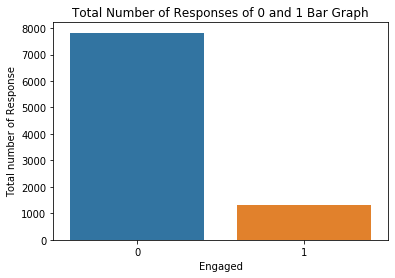

In [10]:
# Create bar graph of the responses of no and yes.
sns.countplot('Response', data = market_df)
plt.xlabel('Engaged')
plt.ylabel('Total number of Response')
plt.title('Total Number of Responses of 0 and 1 Bar Graph')
plt.show()

The low rate of engagement is a concern of the marketing department.  I will investigate what were some attributes of the auto insurance company's customers' that responded to the marketing calls.

I can see an imbalance in the classes.  When I use different models to predict engagement, I will look at executing the models with the imbalance of classes and balance them out with a sample, then execute the models again.

# Feature Engineering

In [11]:
# Split the categorical and numeric variables to analyze seperately.
numeric_df = [f for f in market_df.columns if market_df.dtypes[f] != 'object']
categorical_df = [f for f in market_df.columns if market_df.dtypes[f] == 'object']

In [12]:
# Create dataframe for categorical variables and display top rows.
categorical_df = market_df[categorical_df]
categorical_df.head()

,Customer,State,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,Basic,Bachelor,2/24/2011,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,Extended,Bachelor,1/31/2011,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,Premium,Bachelor,2/19/2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,Basic,Bachelor,1/20/2011,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,Basic,Bachelor,2/3/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
# List unique values of the categorical variables.
for category in categorical_df:
    print(market_df[category].value_counts())

CN30964    1
SF29724    1
QU58523    1
HB70063    1
TW11712    1
          ..
LB25094    1
KZ80383    1
AS26192    1
US82470    1
CG69038    1
Name: Customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
1/10/2011    195
1/27/2011    194
2/14/2011    186
1/26/2011    181
1/17/2011    180
1/19/2011    179
1/3/2011     178
1/31/2011    178
1/20/2011    173
2/26/2011    169
1/28/2011    169
2/19/2011    168
2/27/2011    167
1/5/2011     167
1/11/2011    166
2/4/2011     164
2/28/2011    161
2/10/2011    161
1/29/2011    160
1/2/2011     160
1/21/2011    160
2/5/2011     158
2/22/2011    158
2/3/2011     158
2/7/2011     157
2/12/2011    

Based on the value counts, I can eliminate three variables.  Customer variable is ids for each customer, Effective To Date is dates, and Policy repeats the categories of Policy Type and Policy has different levels.  hte different levels of each category is not described in the dataset description, so they do not seem as significant to include in this analysis.

In [14]:
# Create new dataframe by eliminating three variables.
new_market_df = market_df.drop(['Customer', 'Effective To Date', 'Policy'], 1)

# Verify the variables were dropped.
new_market_df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [15]:
# Split the categorical and numeric variables to analyze seperately.
new_numeric_df = [f for f in new_market_df.columns if new_market_df.dtypes[f] != 'object']
new_categorical_df = [f for f in new_market_df.columns if new_market_df.dtypes[f] == 'object']

In [16]:
# Create dataframes.
new_numeric_df = new_market_df[new_numeric_df]
new_categorical_df = new_market_df[new_categorical_df]

In [17]:
# List of categorical columns to use for label encoding.
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [18]:
new_market_df[cols]

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in new_categorical_df[cols]:
    new_categorical_df[col] = lb.fit_transform(new_categorical_df[col])

In [20]:
new_categorical_df.head(10)

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,1,0,1,1,0,0,0,5,1
1,0,1,0,4,0,1,2,1,2,0,0,1
2,2,2,0,1,0,1,1,1,0,0,5,1
3,1,0,0,4,1,1,1,0,0,2,3,1
4,4,0,0,1,1,0,2,1,0,0,0,1
5,3,0,0,1,0,0,1,1,1,3,5,1
6,3,0,1,1,0,1,1,0,0,0,0,1
7,0,2,4,4,1,2,2,0,0,0,0,1
8,3,0,0,2,1,1,0,0,0,0,0,1
9,3,1,1,1,0,2,1,2,1,1,0,1


# Exploratory Data Analysis

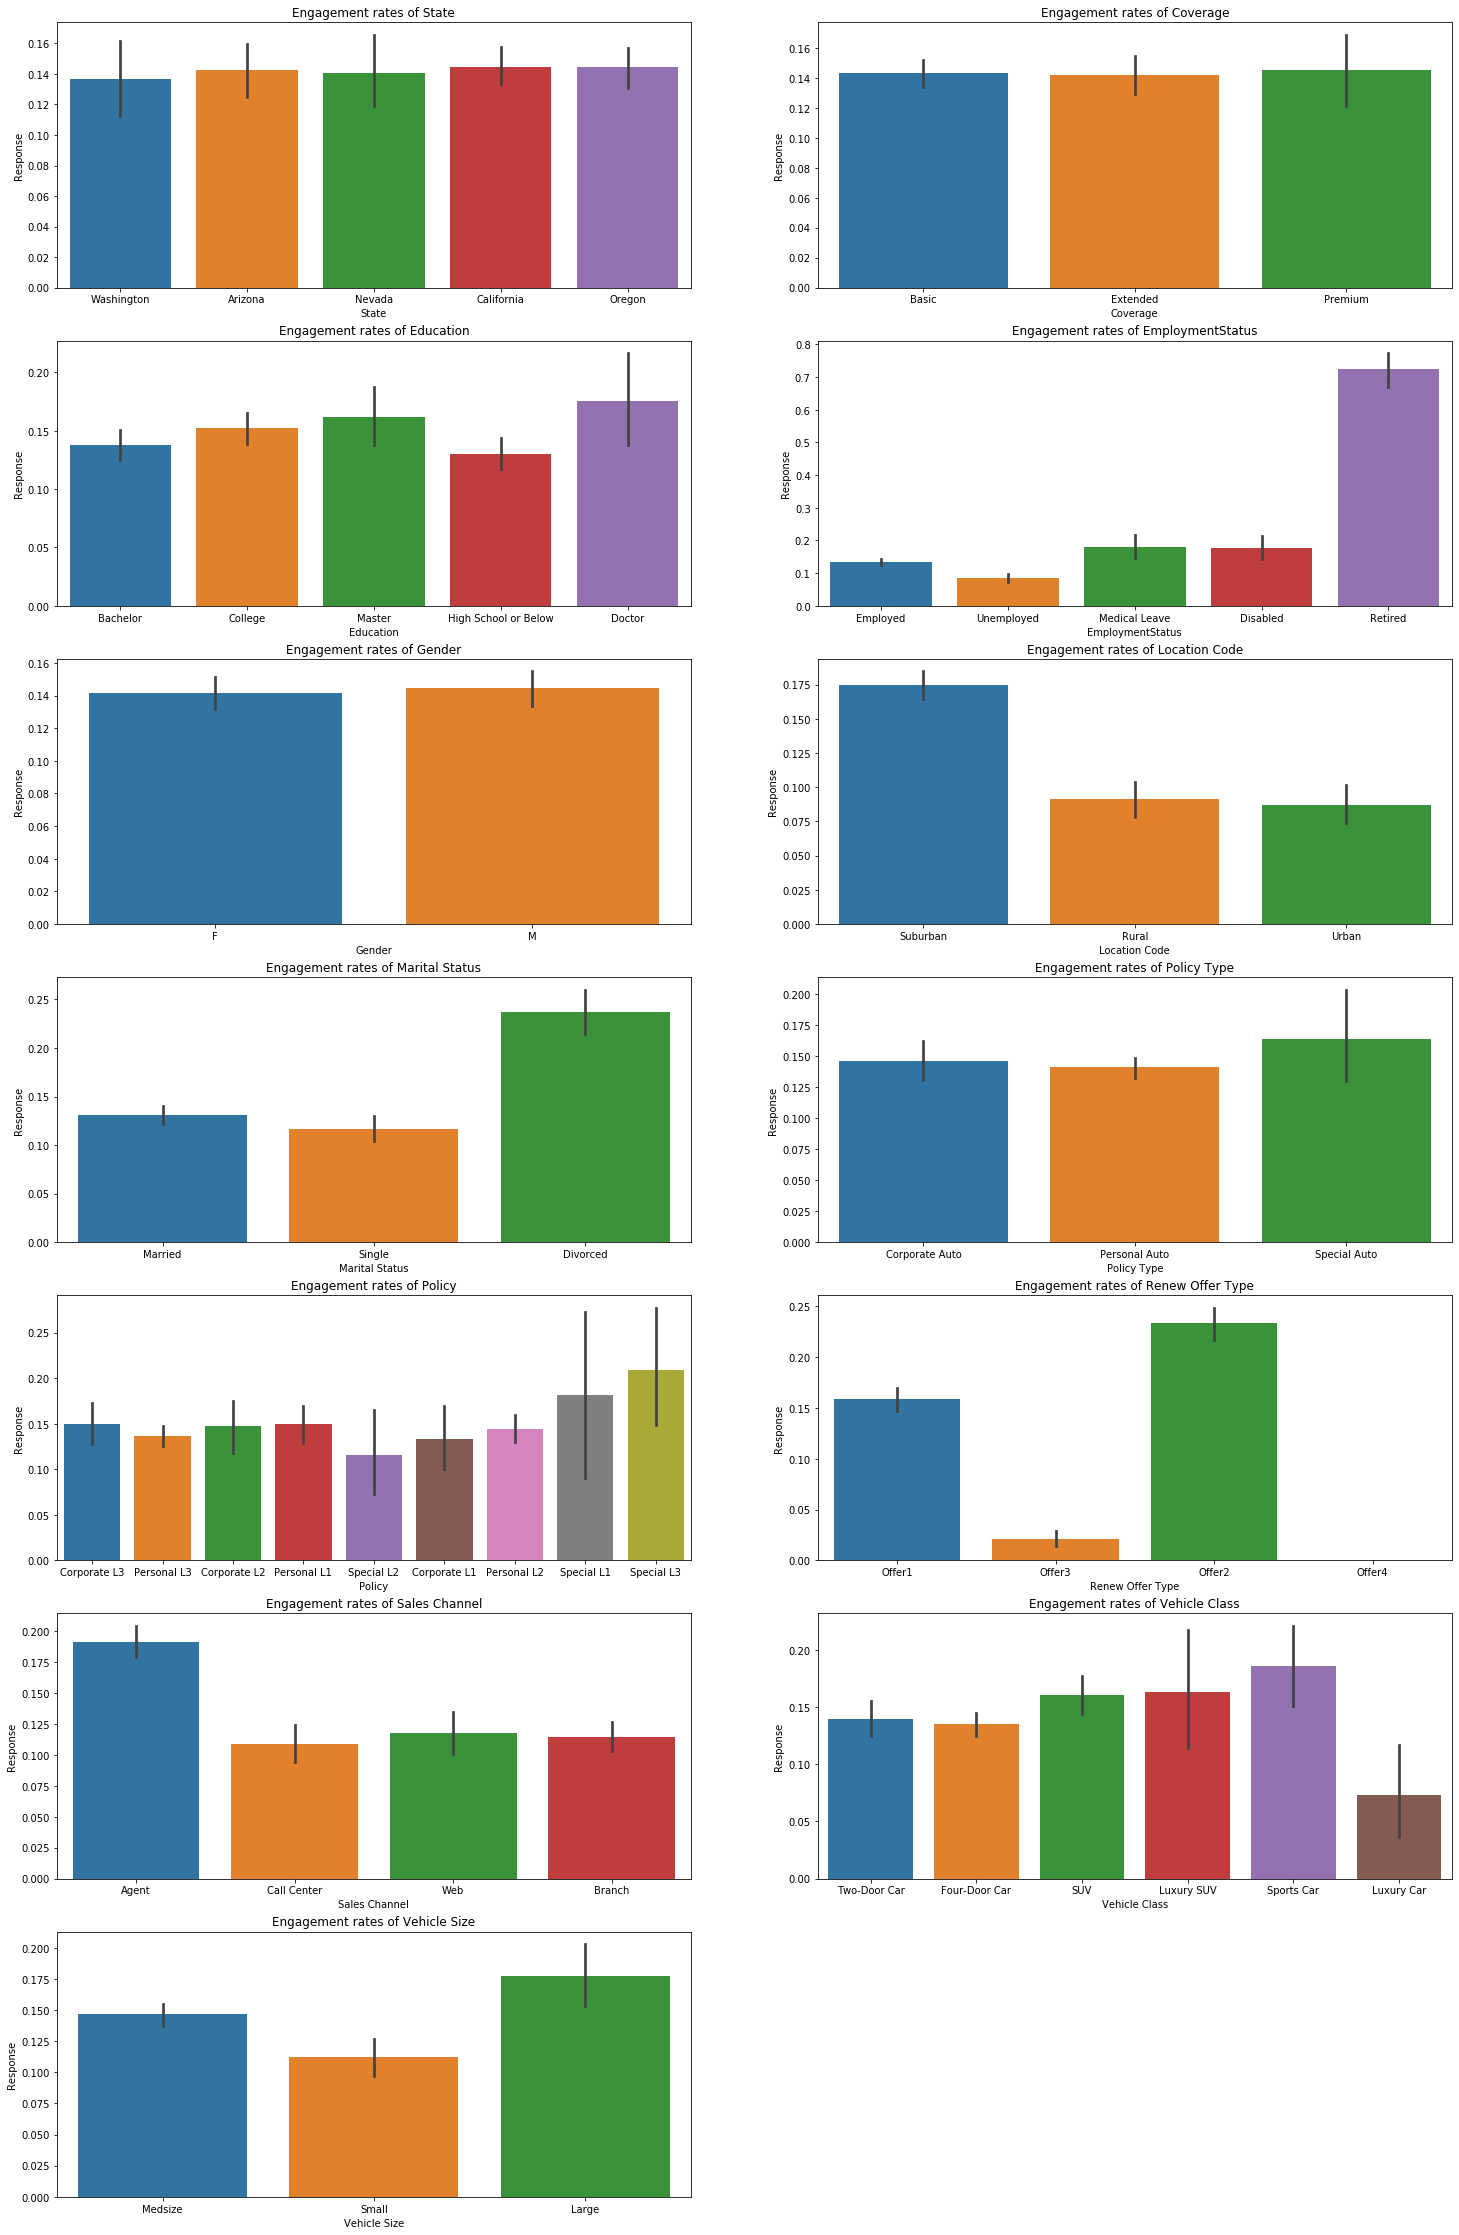

In [21]:
# Display the bar charts for the categorical variables 
all_columns = ['State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']

plt.figure(figsize=(25, 40))

for i in range(len(all_columns)):
    plt.subplot(7, 2, i + 1)
    sns.barplot(x="{}".format(all_columns[i]), y="Response", data=market_df)
    plt.title('Engagement rates of {}'.format(all_columns[i]))       

The bar graphs give me some insight on relationships between the engagement rate and categorical variables.  I can see how the unique values of each categorical variable relates the engagement rate.  For example, the renew offer type 4 has the lowest engagement versus renew offer type 2 is the highest.  The marketing department can use this information to create strategies to increase engagement in renew offer type 4 or eliminate it and focus more of their attention on the renew offer type 1 and 2.  Another insight is with the Sales Channel bar graphs.  I can see that Agents has the most engagement than the other channels.  The marketing department may consider focusing on collaborating with the agents in creating marketing champaigns to retain customers or finding new customers.  Later in my analysis, I will do more investigation in the relationships between categorical variables and target variable.   

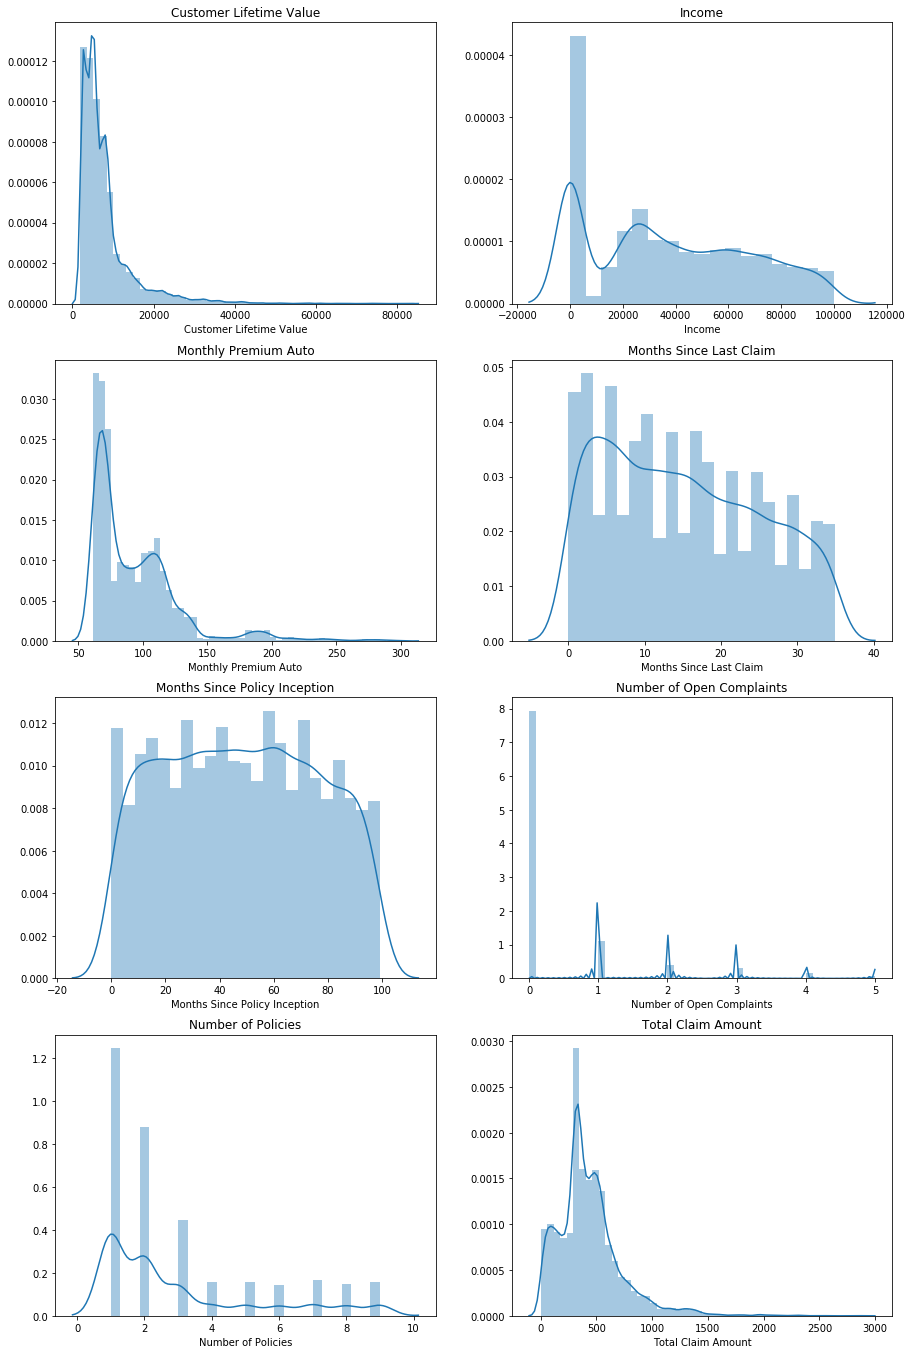

In [22]:
# Check the distributions of the numeric variables.
num_all_columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']

plt.figure(figsize=(15, 30))

for i in range(len(num_all_columns)):
    plt.subplot(5, 2, i + 1)
    sns.distplot(new_numeric_df[num_all_columns[i]])
    plt.title(num_all_columns[i])

Based on the distributions of the numeric variables, I can see none of the variables appear to be approximately normal.  Later in my analysis, I will use linear regression and other regressions that assume normality.  The values of each numeric variable appear to vary.  I will standardize their values after outlier analysis.

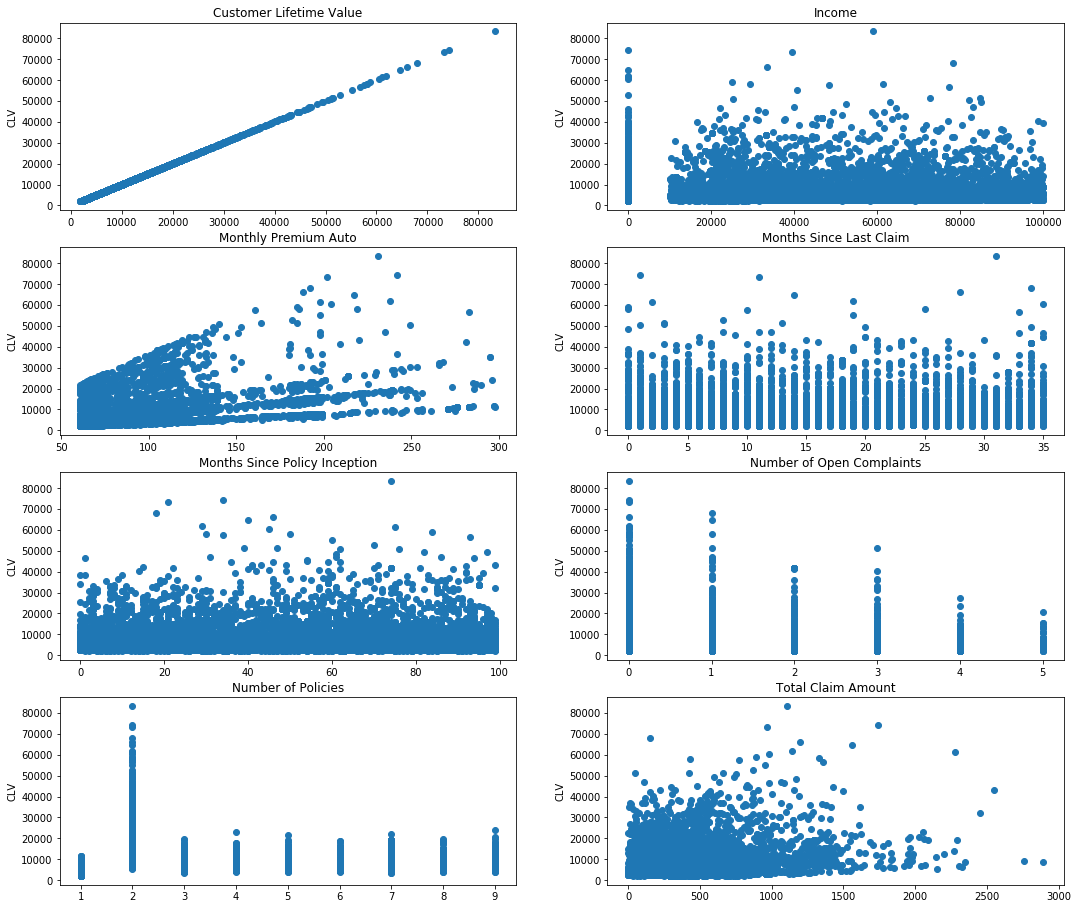

In [23]:
# Scatterplots for numeric variables versus CLV.
plt.figure(figsize=(18, 20))

for i in range(len(num_all_columns)):
    plt.subplot(5, 2, i + 1)
    plt.scatter(new_numeric_df[num_all_columns[i]], new_numeric_df['Customer Lifetime Value'])
    plt.ylabel("CLV")
    plt.title(num_all_columns[i])
plt.show()

The scatterplots tell me the relationships with the numeric variables to the target variable vary greatly.  It appears that the variables number of open complaints and number of policies might be categorical variables because of their discrete values.  I will keep these variables with the numeric variables for the rest of the analysis.

# Discover Relationships Among Predictors and Response

In [24]:
# Logistic regression among the numerical variables with target variable.
X = new_numeric_df.drop(['Response'], 1)
Y = new_numeric_df['Response']

In [25]:
# Fitting the logistic regression to the numerical variables.
num_logit = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [26]:
# Summary of the results from logistic regression of the numerical variables.
num_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                -0.02546
Time:                        10:01:12   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

I can see the p-values of the coefficient estimates that Total Claim Amount has a high p-value of 0.477, which means Total Claim Amount is statistically insignificant.  I will eliminate it from the data before executing machine learning models on the data.

The signs of the coefficients tell me the relationship of the numeric variables to Response.  I can see Income has a negative sign which means the more a customer makes the lower their response to a marketing champaign.  The one surprise is the higher a customer's monthly premium auto the lower their response.  I would assume they want to a better rate.  According to this data, people who can afford higher premiums are less likely to respond to marketing campaigns.  I would want to investigate an idea of people with higher incomes make more informed decisions and less likely to be persuaded with marketing campaigns.  This is not confirmed just an idea to investigate.

In [27]:
# Numerical varibles correlation to check for multicollinearity.
new_corr_matrix = round(new_numeric_df.corr(), 3)
new_corr_matrix

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000,-0.009,0.024,0.396,0.012,0.009,-0.036,0.022,0.226
Response,-0.009,1.000,0.012,0.011,-0.017,0.003,-0.010,-0.021,0.017
Income,0.024,0.012,1.000,-0.017,-0.027,-0.001,0.006,-0.009,-0.355
Monthly Premium Auto,0.396,0.011,-0.017,1.000,0.005,0.020,-0.013,-0.011,0.632
Months Since Last Claim,0.012,-0.017,-0.027,0.005,1.000,-0.043,0.005,0.009,0.008
Months Since Policy Inception,0.009,0.003,-0.001,0.020,-0.043,1.000,-0.001,-0.013,0.003
Number of Open Complaints,-0.036,-0.010,0.006,-0.013,0.005,-0.001,1.000,0.001,-0.014
Number of Policies,0.022,-0.021,-0.009,-0.011,0.009,-0.013,0.001,1.000,-0.002
Total Claim Amount,0.226,0.017,-0.355,0.632,0.008,0.003,-0.014,-0.002,1.000


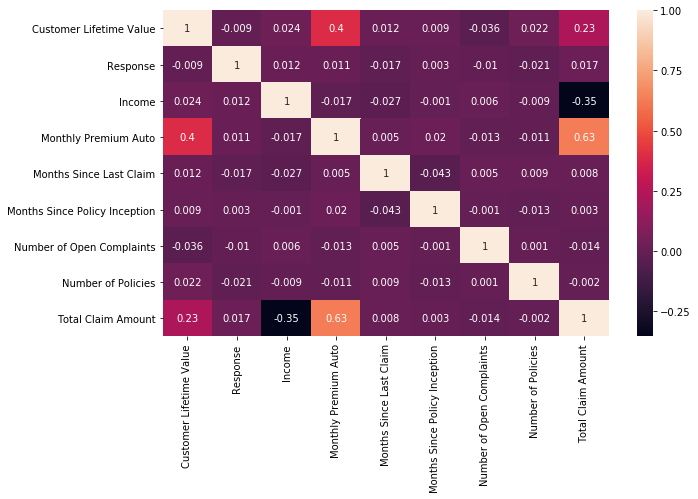

In [28]:
# Heatmap of the numerical variables.
plt.figure(figsize=(10,6))
sns.heatmap(new_corr_matrix, annot=True)
plt.show()

From the heatmap, I see there are two variables that may be correlated.  Those variables are Total Claim Amount and Monthly Premium Auto.  The other variables do not appear to be highly correlated.  I may eliminate one of the variables: Total Claim Amount and Monthly Premium Auto to see how this affects the results of my linear regression.  

In [29]:
# Logistic regression among the categorical variables with target variable.
cat_X = new_categorical_df
cat_Y = new_numeric_df['Response']

In [30]:
# Fitting the logistic regression to the categorical variables.
cat_logit = sm.Logit(cat_Y, cat_X).fit()

Optimization terminated successfully.
         Current function value: 0.387782
         Iterations 7


In [31]:
# Summary of the results from logistic regression of the categorical variables.
cat_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9122
Method:                           MLE   Df Model:                           11
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                 0.05588
Time:                        10:01:20   Log-Likelihood:                -3542.0
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.977e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0317      0.023     -1.400      0.162      -0.076       0.013
Coverage            -0.0693      0.046     -1.510      0.131      -0.159       0.021
Education            0.0049      0.021      0.227      0.821      -0.037       0.047
EmploymentStatus    -0.0509      0.023     -2.170      0.030      -0.097      -0.005
Gender               0.0372      0.060      0.619      0.536      -0.080       0.155
Location Code       -0.0600      0.047     -1.289      0.198      -0.151       0.031
Marital Status      -0.4720      0.047    -10.024      0.000      -0.564      -0.380
Policy Type         -0.0669      0.059     -1.127      0.260      -0.183       0.049
Renew Offer Type    -0.5727      0.037    -15.369      0.000      -0.646      -0.500
Sales Channel       -0.2198      0.030     -7.327      0.000      -0.279      -0.161
Vehicle Class        0.0176      0.014      1.217      0.224      -0.011       0.046
Vehicle Size        -0.3522      0.052     -6.803      0.000      -0.454      -0.251
====================================================================================
"""

There are two variables' (Education, Gender) coefficient estimate with high p-values.  I will eliminate these variables before executing the machine learning models.

In [32]:
# Added Response variable to the new_categorical_df.
new_categorical_df['Response'] = new_numeric_df['Response']

In [33]:
# Categorical varibles correlation to check for multicollinearity.
# new_categorical_df.insert(1, 'Response', new_market_df['Response'], True)
cat_corr_matrix = round(new_categorical_df.corr(), 3)
cat_corr_matrix

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Response
State,1.000,0.002,0.016,0.000,-0.005,-0.005,0.020,0.009,-0.007,-0.003,0.011,0.007,-0.002
Coverage,0.002,1.000,0.022,0.003,-0.014,-0.020,0.003,0.001,-0.049,-0.025,-0.018,-0.004,0.001
Education,0.016,0.022,1.000,-0.025,0.002,-0.012,0.006,0.012,0.068,-0.005,0.010,-0.005,0.000
EmploymentStatus,0.000,0.003,-0.025,1.000,0.035,0.016,0.312,-0.002,-0.121,-0.018,-0.002,-0.011,-0.017
Gender,-0.005,-0.014,0.002,0.035,1.000,0.003,0.034,-0.002,0.045,-0.021,0.020,-0.000,0.004
Location Code,-0.005,-0.020,-0.012,0.016,0.003,1.000,0.016,0.015,-0.024,-0.004,0.002,0.021,0.002
Marital Status,0.020,0.003,0.006,0.312,0.034,0.016,1.000,0.013,-0.026,-0.018,0.018,0.017,-0.095
Policy Type,0.009,0.001,0.012,-0.002,-0.002,0.015,0.013,1.000,-0.001,-0.000,-0.005,0.004,0.001
Renew Offer Type,-0.007,-0.049,0.068,-0.121,0.045,-0.024,-0.026,-0.001,1.000,0.136,-0.015,0.013,-0.163
Sales Channel,-0.003,-0.025,-0.005,-0.018,-0.021,-0.004,-0.018,-0.000,0.136,1.000,-0.003,-0.001,-0.087


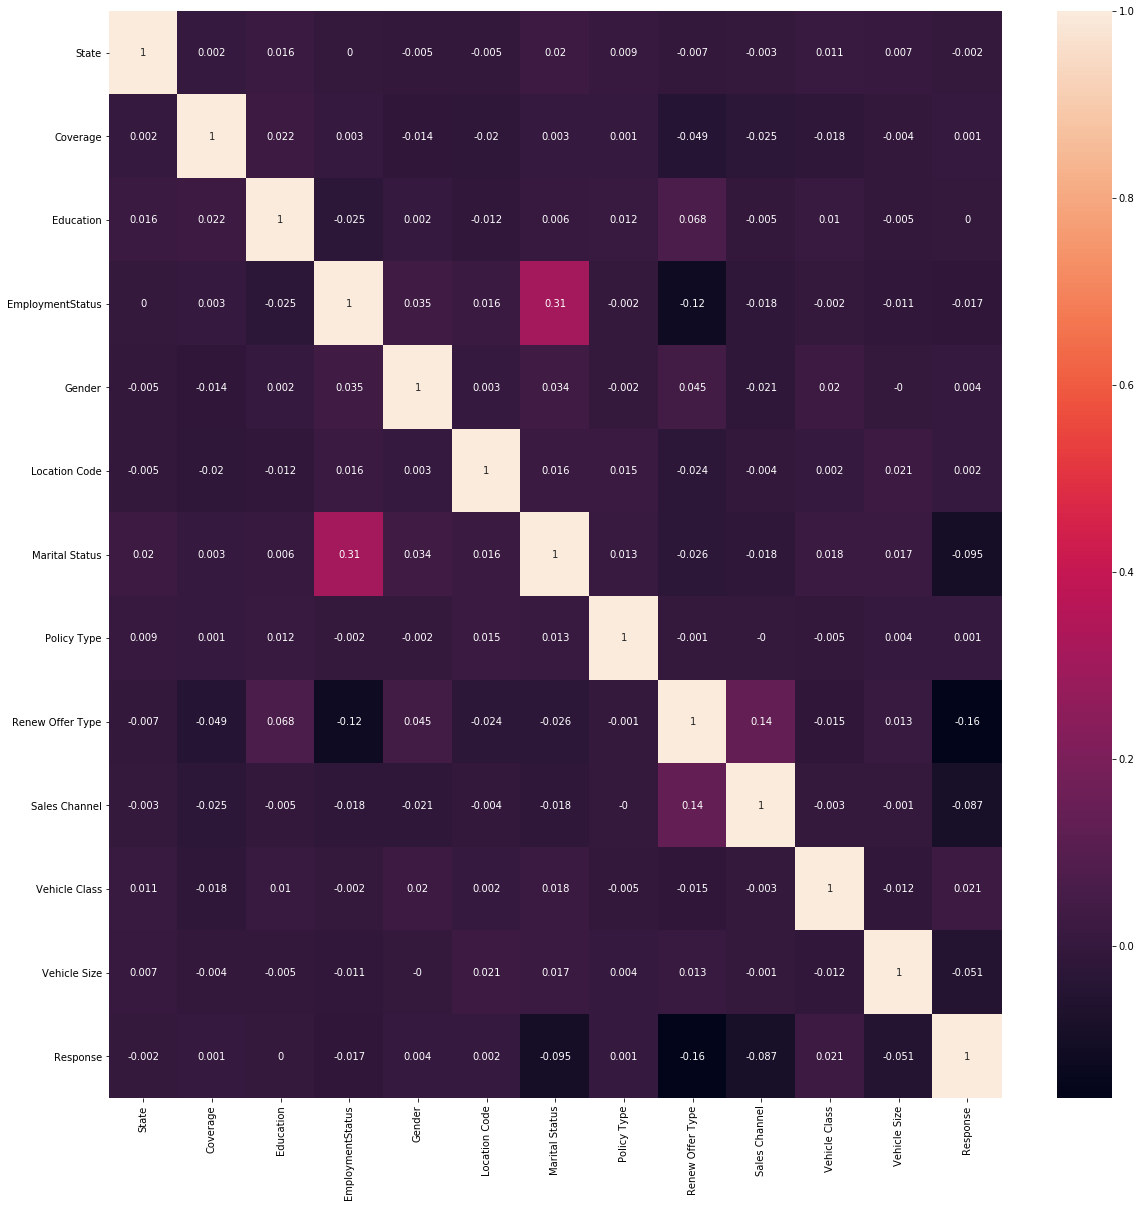

In [34]:
# Heatmap of the correlations of the categorical variables.
plt.figure(figsize=(20,20))
sns.heatmap(cat_corr_matrix, annot=True)
plt.show()

I can see from the heatmap of the categorical variables that there are no variables highly correlated to one another.

# Outlier Analysis

In [35]:
# Display summary statistics to check for outliers.
new_numeric_df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


I suspect there are several variables with outliers based on their min and max values compared to their medians.  I want to verify their are outliers and correct them in the next sections of my analysis.

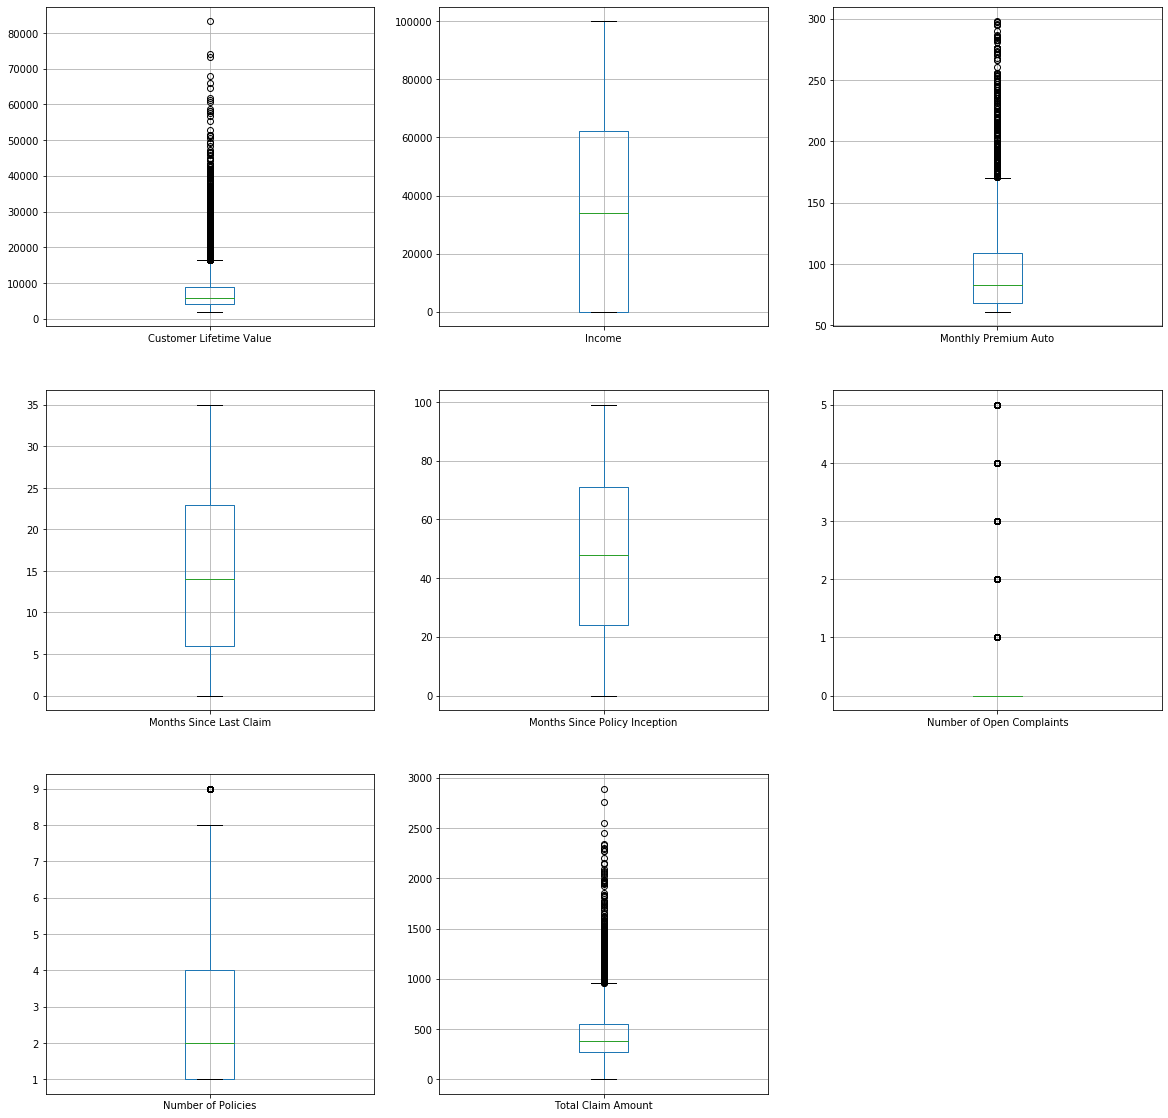

In [36]:
# Detecting outliers through plotting box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'], start=1):
    plt.subplot(3, 3, i)
    new_numeric_df.boxplot(col,whis=1.5)
    
plt.show()

In [37]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'], start=1):
    q75, q25 = np.percentile(new_numeric_df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((new_numeric_df[col] > max_val) | 
                                                                                           (new_numeric_df[col] < min_val))[0])),
                                                                             len((np.where((new_numeric_df[col] > max_val) | 
                                                                                           (new_numeric_df[col] < min_val))[0]))*100/9134))

Number of outliers and percentage of it in Customer Lifetime Value : 817 and 8.94460258375301
Number of outliers and percentage of it in Income : 0 and 0.0
Number of outliers and percentage of it in Monthly Premium Auto : 430 and 4.707685570396322
Number of outliers and percentage of it in Months Since Last Claim : 0 and 0.0
Number of outliers and percentage of it in Months Since Policy Inception : 0 and 0.0
Number of outliers and percentage of it in Number of Open Complaints : 1882 and 20.604335449967156
Number of outliers and percentage of it in Number of Policies : 416 and 4.554412086708999
Number of outliers and percentage of it in Total Claim Amount : 453 and 4.959492007882636


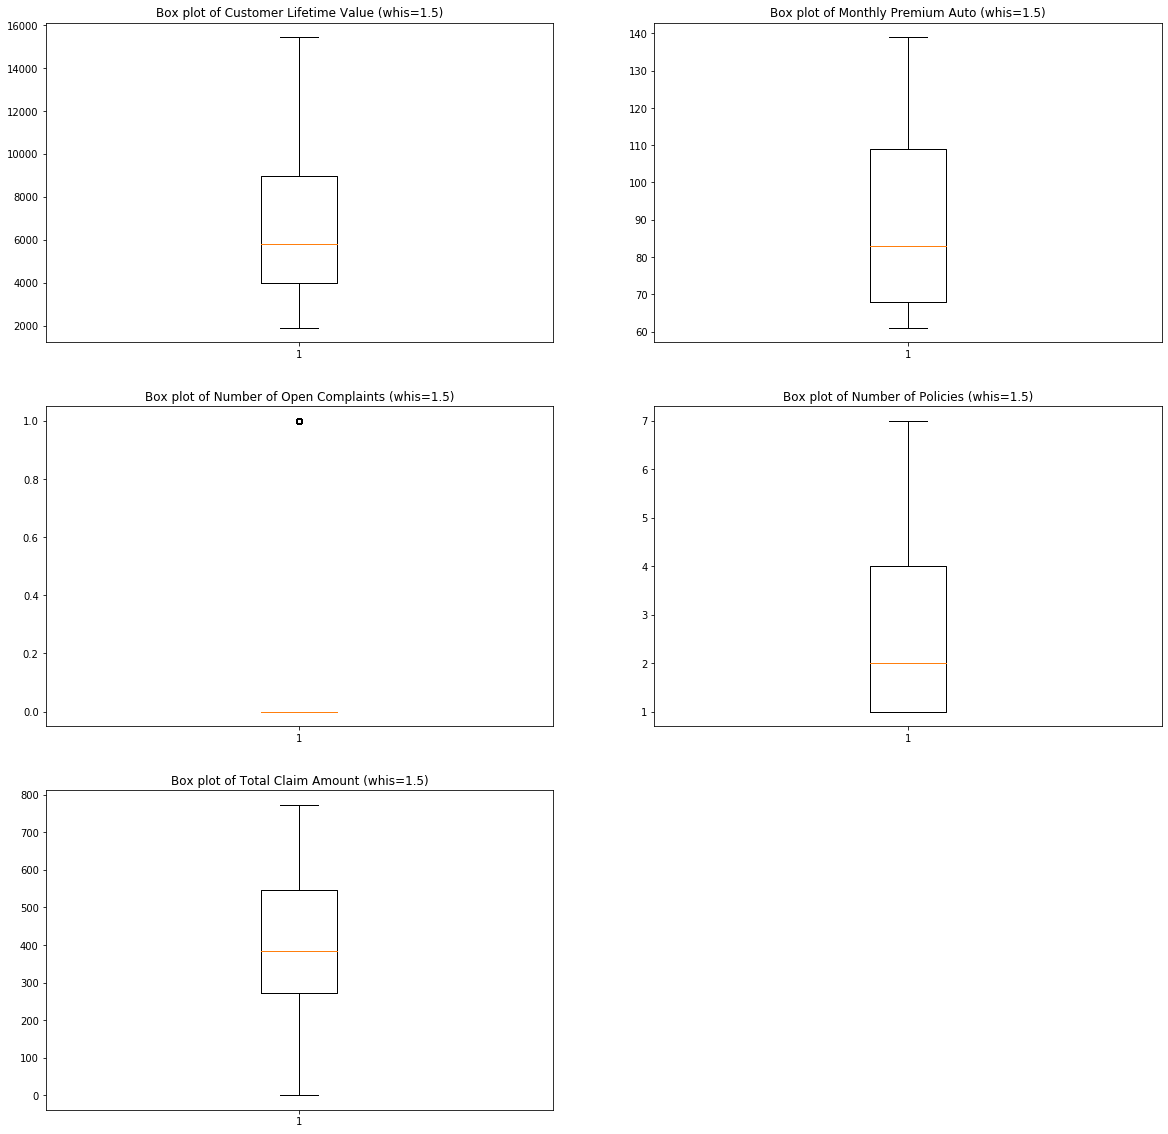

In [38]:
# Winsorize the 5 columns with outliers and plotting them.
import scipy
import scipy.stats
from scipy.stats.mstats import winsorize
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
winsorized_Customer_Lifetime_Value = winsorize(new_numeric_df["Customer Lifetime Value"], (0, 0.10))
plt.boxplot(winsorized_Customer_Lifetime_Value)
plt.title("Box plot of Customer Lifetime Value (whis=1.5)")

plt.subplot(3,2,2)
winsorized_Monthly_Premium_Auto = winsorize(new_numeric_df["Monthly Premium Auto"], (0, 0.06))
plt.boxplot(winsorized_Monthly_Premium_Auto)
plt.title("Box plot of Monthly Premium Auto (whis=1.5)")

plt.subplot(3,2,3)
winsorized_Number_of_Open_Complaints = winsorize(new_numeric_df["Number of Open Complaints"], (0.10, 0.20))
plt.boxplot(winsorized_Number_of_Open_Complaints)
plt.title("Box plot of Number of Open Complaints (whis=1.5)")

plt.subplot(3,2,4)
winsorized_Number_of_Policies = winsorize(new_numeric_df["Number of Policies"], (0.05, 0.10))
plt.boxplot(winsorized_Number_of_Policies)
plt.title("Box plot of Number of Policies (whis=1.5)")

plt.subplot(3,2,5)
winsorized_Total_Claim_Amount = winsorize(new_numeric_df["Total Claim Amount"], (0, 0.10))
plt.boxplot(winsorized_Total_Claim_Amount)
plt.title("Box plot of Total Claim Amount (whis=1.5)")

plt.show()

The variable Number of Open Complaints still has an outlier.  I was unable to correct for it.  I will keep this in mind for ther remainder of the analysis.

In [39]:
# Add variables to the new_numeric_df dataframe
new_numeric_df['winsorized_Customer_Lifetime_Value'] = winsorized_Customer_Lifetime_Value
new_numeric_df['winsorized_Monthly_Premium_Auto'] = winsorized_Monthly_Premium_Auto
new_numeric_df['winsorized_Number_of_Open_Complaints'] = winsorized_Number_of_Open_Complaints
new_numeric_df['winsorized_Number_of_Policies'] = winsorized_Number_of_Policies
new_numeric_df['winsorized_Total_Claim_Amount'] = winsorized_Total_Claim_Amount

In [40]:
# Verify the winsorized columns were added to the dataframe. 
new_numeric_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,winsorized_Customer_Lifetime_Value,winsorized_Monthly_Premium_Auto,winsorized_Number_of_Open_Complaints,winsorized_Number_of_Policies,winsorized_Total_Claim_Amount
0,2763.519279,0,56274,69,32,5,0,1,384.811147,2763.519279,69,0,1,384.811147
1,6979.535903,0,0,94,13,42,0,8,1131.464935,6979.535903,94,0,7,773.470977
2,12887.431650,0,48767,108,18,38,0,2,566.472247,12887.431650,108,0,2,566.472247
3,7645.861827,0,0,106,18,65,0,7,529.881344,7645.861827,106,0,7,529.881344
4,2813.692575,0,43836,73,12,44,0,1,138.130879,2813.692575,73,0,1,138.130879


In [41]:
# Eliminate the numeric variables that were winsorized in new_numeric_df.
new_numeric_df = new_numeric_df.drop(["Customer Lifetime Value",
                                     "Monthly Premium Auto",
                                     "Number of Open Complaints",
                                     "Number of Policies",
                                     "Total Claim Amount"], 1)

In [42]:
# Verify the columns were dropped.
new_numeric_df.columns

Index(['Response', 'Income', 'Months Since Last Claim',
       'Months Since Policy Inception', 'winsorized_Customer_Lifetime_Value',
       'winsorized_Monthly_Premium_Auto',
       'winsorized_Number_of_Open_Complaints', 'winsorized_Number_of_Policies',
       'winsorized_Total_Claim_Amount'],
      dtype='object')

# Feature Engineering

I eliminated the three variables: Customers, Effective To Date, and Policy, at the beginning.    Based on the logistic regression analysis above, there are three more variables I will eliminate because their relationship to the target variable are statistically insignificant.  The variables are Education, Gender, and Total Claim Amount.  In addition to eliminating these variables, I will standardize the numeric variables.

In [43]:
# Standardizing the numeric variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
# Fit the StandardScaler to the numeric data.
scaler.fit(new_numeric_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
# Transform the StandardScaler to the numeric data.
converted_data = scaler.transform(new_numeric_df)

In [46]:
# Create a data frame with the scaled numeric data.
scaled_new_numeric_df = pd.DataFrame(data=converted_data, columns=new_numeric_df.columns)

In [47]:
# Dropped the Response variable because it was scaled and did not need to be.
scaled_new_numeric_df = scaled_new_numeric_df.drop(['Response'], 1)

In [48]:
# Merging scaled numeric data frame and categorical data frame.
results_df = pd.concat([scaled_new_numeric_df, new_categorical_df], axis=1, sort=False)

In [49]:
# Dropping Education, Gender, and Total Claim Amount.
results_df = results_df.drop(['Education', 'Gender', 'winsorized_Total_Claim_Amount'], 1)

In [50]:
# Finalized data frame for the machine learning algorithm.
results_df.head()

,Income,Months Since Last Claim,Months Since Policy Inception,winsorized_Customer_Lifetime_Value,winsorized_Monthly_Premium_Auto,winsorized_Number_of_Open_Complaints,winsorized_Number_of_Policies,State,Coverage,EmploymentStatus,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Response
0,0.612827,1.678099,-1.543287,-1.072333,-0.854216,-0.509426,-0.874229,4,0,1,1,1,0,0,0,5,1,0
1,-1.239617,-0.208186,-0.217334,-0.028162,0.172049,-0.509426,1.987341,0,1,4,1,2,1,2,0,0,1,0
2,0.365710,0.288205,-0.360680,1.435032,0.746758,-0.509426,-0.397301,2,2,1,1,1,1,0,0,5,1,0
3,-1.239617,0.288205,0.606907,0.136865,0.664657,-0.509426,1.987341,1,0,4,1,1,0,0,2,3,1,0
4,0.203390,-0.307465,-0.145661,-1.059907,-0.690013,-0.509426,-0.874229,4,0,1,0,2,1,0,0,0,1,0


In [51]:
# Check for multicollinearity of the final data frame.
result_corr_matrix = round(results_df.corr(), 3)
result_corr_matrix

,Income,Months Since Last Claim,Months Since Policy Inception,winsorized_Customer_Lifetime_Value,winsorized_Monthly_Premium_Auto,winsorized_Number_of_Open_Complaints,winsorized_Number_of_Policies,State,Coverage,EmploymentStatus,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Response
Income,1.000,-0.027,-0.001,0.032,-0.021,0.005,-0.009,0.005,-0.011,-0.727,-0.028,-0.232,0.002,0.140,0.013,0.004,0.008,0.012
Months Since Last Claim,-0.027,1.000,-0.043,0.006,-0.003,0.008,0.012,0.002,0.017,0.008,-0.017,0.008,-0.017,-0.016,0.004,-0.002,-0.005,-0.017
Months Since Policy Inception,-0.001,-0.043,1.000,-0.003,0.016,-0.015,-0.013,0.014,0.011,0.015,0.007,-0.029,-0.004,-0.092,-0.005,0.003,0.005,0.003
winsorized_Customer_Lifetime_Value,0.032,0.006,-0.003,1.000,0.436,-0.023,0.139,0.004,0.211,-0.039,0.002,-0.030,0.017,-0.089,-0.013,0.102,0.017,0.000
winsorized_Monthly_Premium_Auto,-0.021,-0.003,0.016,0.436,1.000,-0.013,-0.016,0.000,0.519,0.017,0.003,0.011,0.000,-0.092,-0.013,0.243,-0.002,0.011
winsorized_Number_of_Open_Complaints,0.005,0.008,-0.015,-0.023,-0.013,1.000,0.000,-0.001,-0.010,0.006,-0.017,-0.006,-0.000,-0.062,-0.005,-0.021,0.005,-0.018
winsorized_Number_of_Policies,-0.009,0.012,-0.013,0.139,-0.016,0.000,1.000,-0.015,-0.015,0.007,0.005,0.012,-0.003,-0.084,0.012,-0.004,0.025,-0.026
State,0.005,0.002,0.014,0.004,0.000,-0.001,-0.015,1.000,0.002,0.000,-0.005,0.020,0.009,-0.007,-0.003,0.011,0.007,-0.002
Coverage,-0.011,0.017,0.011,0.211,0.519,-0.010,-0.015,0.002,1.000,0.003,-0.020,0.003,0.001,-0.049,-0.025,-0.018,-0.004,0.001
EmploymentStatus,-0.727,0.008,0.015,-0.039,0.017,0.006,0.007,0.000,0.003,1.000,0.016,0.312,-0.002,-0.121,-0.018,-0.002,-0.011,-0.017


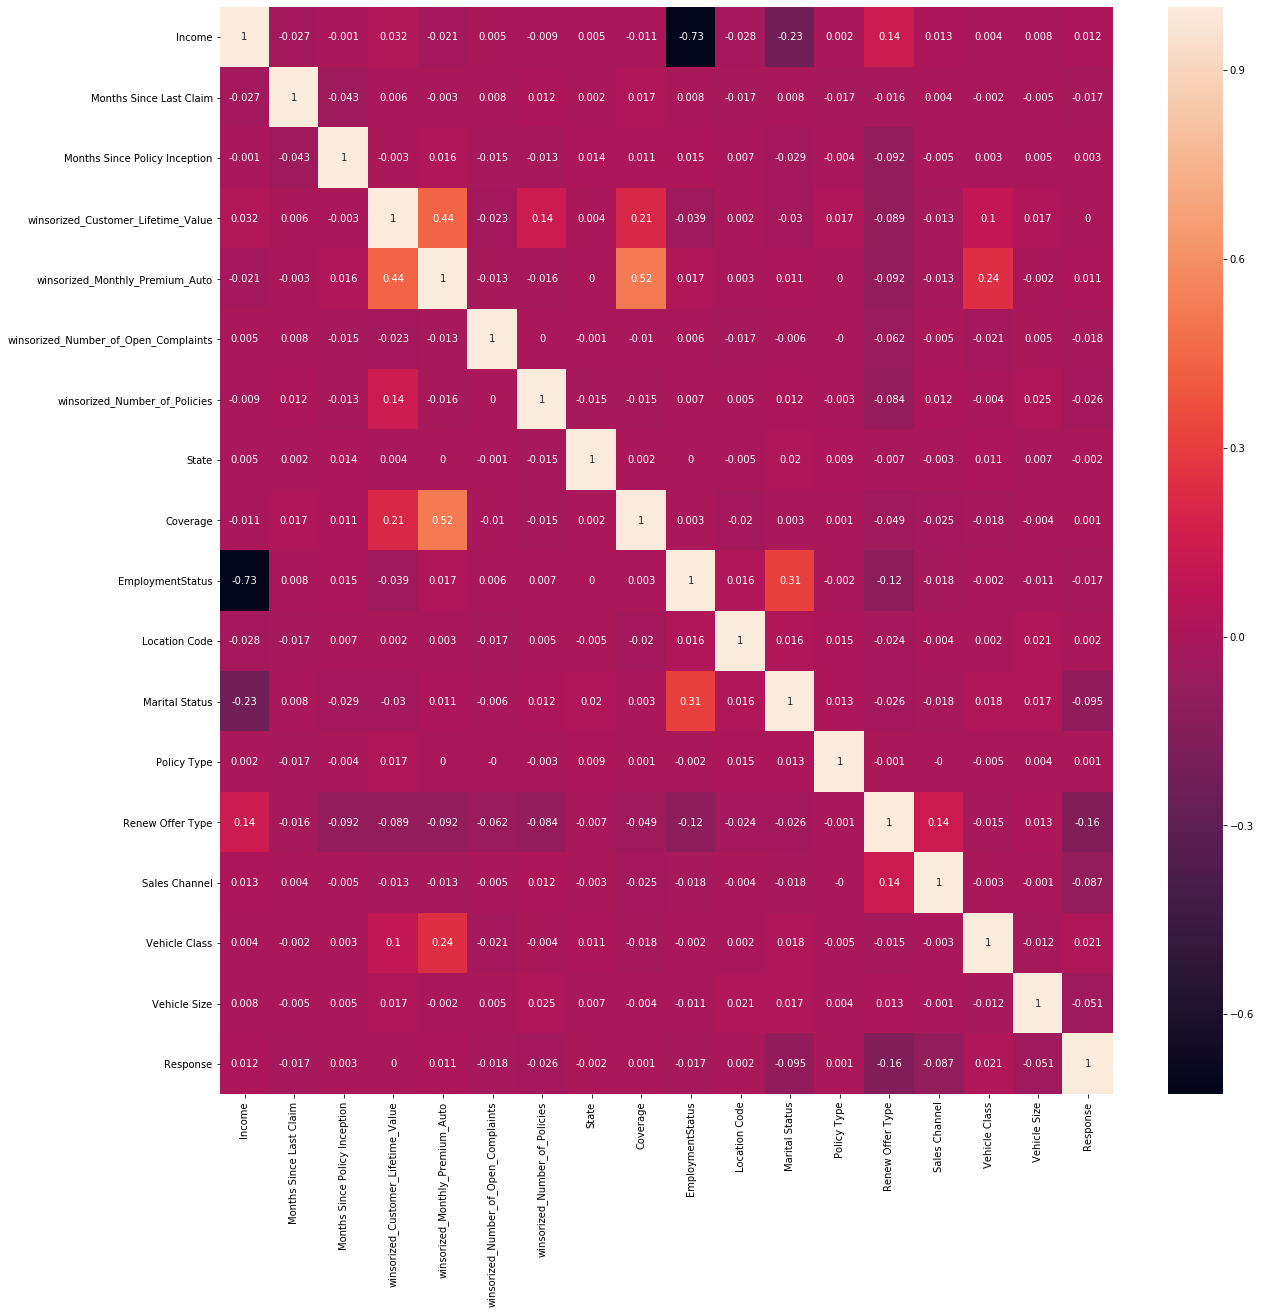

In [52]:
# Heatmap of correlations of final data frame.
plt.figure(figsize=(20,20))
sns.heatmap(result_corr_matrix, annot=True)
plt.show()

I can see Income and EmploymentStatus are highly negatively correlated.

# Evaluate Models for Predicting Response

In [53]:
# Define X and Y for training/testing datasets to use for ML models.
X2 = results_df.drop(['Response'], 1)
y2 = results_df['Response']

In [54]:
# Splitting the data into train (67%) and test (33%) data.
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.33, random_state=2)

In [55]:
# Predicting 'Response' with logistic regression.
# Initialize the model.
lr = LogisticRegression()

# Fit the  model to the train data.
lr.fit(X_train, y_train)

# Predict outcomes with test data.
y_pred = lr.predict(X_test)

# Compare the test data with the data.
acc = lr.score(X_test, y_test)*100

print("Logistic Regression Test Accuracy", round(acc, 2), "%")

Logistic Regression Test Accuracy 85.7 %


In [56]:
# 10 k-fold cross validation for logistic regression.
from sklearn import model_selection
seed = 7
kfold_lr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(lr, X2, y2, cv=kfold_lr)
print(results)
print("Logistic Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.84245077 0.85557987 0.86105033 0.86870897 0.82803943 0.86856517
 0.8762322  0.83570646 0.85761227 0.87294633]
Logistic Regression K-Fold Accuracy 85.67 %


In [57]:
# Python script for confusion matrix creation for logistic regression. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred)) 

Confusion Matrix :
[[2584    0]
 [ 431    0]]
Accuracy Score : 0.8570480928689884
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2584
           1       0.00      0.00      0.00       431

    accuracy                           0.86      3015
   macro avg       0.43      0.50      0.46      3015
weighted avg       0.73      0.86      0.79      3015



In [58]:
# Predicting 'Response' with k-nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model.
knn = KNeighborsClassifier(n_neighbors = 2) # n_neighbors means k

# Fit the model to the train set.
knn.fit(X_train, y_train)

# Prediction.
y_pred = knn.predict(X_test)

# Compare the test data with the data.
acc = knn.score(X_test, y_test)*100

print("2 neighbors KNN Score: ", round(acc, 2), "%")

2 neighbors KNN Score:  91.54 %


In [59]:
# 10 k-fold cross validation for KNN.
from sklearn import model_selection
seed = 7
kfold_knn = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(knn, X2, y2, cv=kfold_knn)
print(results)
print("KNN K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.9321663  0.93107221 0.93982495 0.93654267 0.932092   0.9441402
 0.93756846 0.92552026 0.92771084 0.94194962]
KNN K-Fold Accuracy 93.49 %


In [60]:
# Python script for confusion matrix for KNN.
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred)) 

Confusion Matrix :
[[2457  127]
 [ 128  303]]
Accuracy Score : 0.9154228855721394
Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2584
           1       0.70      0.70      0.70       431

    accuracy                           0.92      3015
   macro avg       0.83      0.83      0.83      3015
weighted avg       0.92      0.92      0.92      3015



In [61]:
# Predicting 'Response' with support vector machine classifier.
from sklearn.svm import SVC

# Initialize the model.
svm = SVC()

# Fit the model to the train set.
svm.fit(X_train, y_train)

# Prediction.
y_pred = svm.predict(X_test)

# Compare the test data with the data.
acc = svm.score(X_test, y_test)*100

print("SVM Algorithm Test Accuracy", round(acc, 2), "%")

# cross_val_score(svm, X, Y, cv=5)

SVM Algorithm Test Accuracy 86.24 %


In [62]:
# 10 k-fold cross validation for support vector machine.
from sklearn import model_selection
seed = 7
kfold_svm = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(svm, X2, y2, cv=kfold_svm)
print(results)
print("Support Vector Machine K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.85557987 0.8643326  0.86761488 0.87636761 0.84118291 0.87404162
 0.88828039 0.8422782  0.86308872 0.88937568]
Support Vector Machine K-Fold Accuracy 86.62 %


In [63]:
# Python script for confusion matrix for SVM.
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred)) 

Confusion Matrix :
[[2583    1]
 [ 414   17]]
Accuracy Score : 0.8623548922056384
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2584
           1       0.94      0.04      0.08       431

    accuracy                           0.86      3015
   macro avg       0.90      0.52      0.50      3015
weighted avg       0.87      0.86      0.80      3015



In [64]:
# Predicting 'Response' with a decision tree classifier.
from sklearn.tree import DecisionTreeClassifier

# Initialize the model.
dtc = DecisionTreeClassifier()

# Fit the model to the train set. 
dtc.fit(X_train, y_train)

# Prediction.
y_pred = dtc.predict(X_test)

# Compare the test data with the data.
acc = dtc.score(X_test, y_test)*100

print("Decision Tree Test Accuracy", round(acc, 2), "%")

Decision Tree Test Accuracy 95.92 %


In [65]:
# 10 k-fold cross validation for decision tree classifier.
from sklearn import model_selection
seed = 7
kfold_dtc = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(dtc, X2, y2, cv=kfold_dtc)
print(results)
print("Decision Tree Classifier K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.96389497 0.9726477  0.97483589 0.97155361 0.97480832 0.97042716
 0.98357065 0.97371303 0.97261774 0.97480832]
Decision Tree Classifier K-Fold Accuracy 97.33 %


In [66]:
# Python script for confusion matrix for Decision Trees.
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred)) 

Confusion Matrix :
[[2478  106]
 [  17  414]]
Accuracy Score : 0.9592039800995025
Report : 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2584
           1       0.80      0.96      0.87       431

    accuracy                           0.96      3015
   macro avg       0.89      0.96      0.92      3015
weighted avg       0.97      0.96      0.96      3015



In [67]:
# Predicting 'Response' with a random forest classifier.

# Initialize the model.
rfc = RandomForestClassifier()

# Fit the model to the train set. 
rfc.fit(X_train, y_train)

# Prediction.
y_pred = rfc.predict(X_test)

# Compare the test data with the data.
acc = rfc.score(X_test, y_test)*100

print("Random Forest Test Accuracy", round(acc, 2), "%")

Random Forest Test Accuracy 99.34 %


In [68]:
# 10 k-fold cross validation for random forest classifier.
from sklearn import model_selection
seed = 7
kfold_rfc = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(rfc, X2, y2, cv=kfold_rfc)
print(results)
print("Random Forest Classifier K-Fold Accuracy", round(results.mean()*100, 2), "%")

[1.         0.99781182 0.99890591 0.99562363 0.99123768 0.99890471
 0.99890471 0.99780942 0.99780942 0.99780942]
Random Forest Classifier K-Fold Accuracy 99.75 %


In [72]:
# Based on the cross-validation scores, Random Forest Classifier will be used for predicting.
# Grid search algorithm will be used to tune the Random Forest Classifier for better accuracy.
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator=RandomForestClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [73]:
# Fitting the grid search algorithm to the dataset.
gd_sr.fit(X2, y2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [74]:
# Printing the best parameters.
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}


In [75]:
# Find the best accuracy.
best_result = gd_sr.best_score_
print(best_result)

0.9990146704620101


After tuning the hyperparameters, the accuracy of the random forest classifier increase by 0.2.

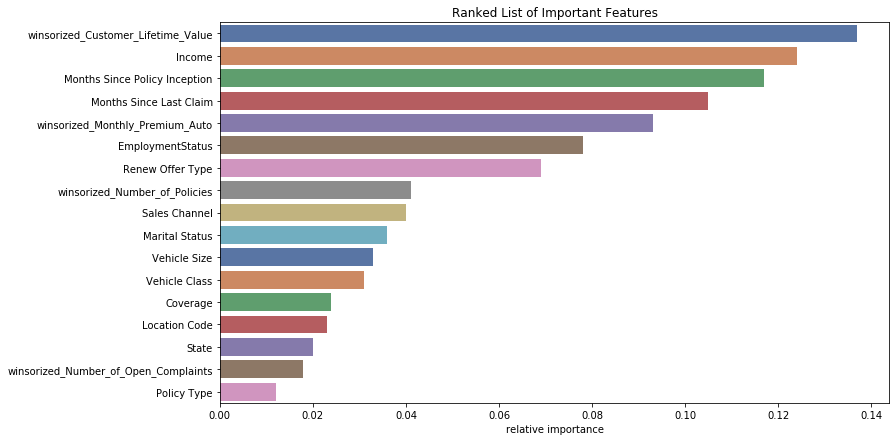

In [76]:
# List the importance of the features ranked from the random forest classifier. 
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X2.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.title('Ranked List of Important Features')
plt.xlabel('relative importance')
plt.show()

In [82]:
# Python script for confusion matrix for Random Forest.
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred)) 

Confusion Matrix :
[[2572   12]
 [ 361   70]]
Accuracy Score : 0.876285240464345
Report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2584
           1       0.85      0.16      0.27       431

    accuracy                           0.88      3015
   macro avg       0.87      0.58      0.60      3015
weighted avg       0.87      0.88      0.84      3015



In [83]:
# Predicting 'Response' with a XGBoost classifier.
from xgboost import XGBClassifier

# Initialize the model.
xgbc = XGBClassifier()

# Fit the model to the train set. 
xgbc.fit(X_train, y_train)

# Prediction.
y_pred = xgbc.predict(X_test)

# Compare the test data with the data.
acc = xgbc.score(X_test, y_test)*100

print("XGBoost Classifier Test Accuracy", round(acc, 2), "%")

XGBoost Classifier Test Accuracy 87.63 %


In [84]:
# 10 k-fold cross validation for XGBoost Classifier.
from sklearn import model_selection
seed = 7
kfold_xgbc = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(xgbc, X2, y2, cv=kfold_xgbc)
print(results)
print("XGBoost Classifier K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.86870897 0.87527352 0.87964989 0.88730853 0.84994524 0.88170865
 0.88389923 0.85980285 0.88170865 0.89375685]
XGBoost Classifier K-Fold Accuracy 87.62 %


In [85]:
# Python script for confusion matrix for XGBoost Classifier.
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :', accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred)) 

Confusion Matrix :
[[2572   12]
 [ 361   70]]
Accuracy Score : 0.876285240464345
Report : 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2584
           1       0.85      0.16      0.27       431

    accuracy                           0.88      3015
   macro avg       0.87      0.58      0.60      3015
weighted avg       0.87      0.88      0.84      3015



# Conclusion

I chose the various models above because I wanted to predict whether a customer would respond to the marketing campaign or  not.  The classificatoin algorithms I chose were k-nearest neighbors, support vector machines, decision tree classifier, random forest classifier, xgboost classifier, and logistic regression.  All of these algorithms will enable me to predict the response of a customer.  Based on the results, the random forest classifer had the highest accuracy rate.  I will evaluate the random forest classifier using confusion matrix and the various metrics connected to the confusion matrix because the class was imbalanced.  There were more customers that did not respond than did respond to the marketing campaign.  The precision, recall, and f1 score are all hovering around 99% close to the accuracy score.  This means the random forest classifier is still the best performing model amongst all of the models chosen.  

I noticed the top 5 important features in predicting a customer's response based on the random forest classifier are winsorized_Customer_Lifetime_Value, Months Since Policy Inception, Income, Months Since Last Claim, and winsorized_Monthly_Premium_Auto.  These are attributes of a customer the marketing team will need to consider when creating their marketing campaigns for the future.

# Evaluate Models for Predicting Customer Lifetime Value

The ability to predict customer lifetime value will allow this company to look at how much value will a customer will bring based on customer's demographics.  I will predict customer lifetime value.  I will investigate many regression models and decide at the end which model will best predict predict customer lifetime value.

In [86]:
# Splitting the data into train and test data.
X3 = results_df.drop(['winsorized_Customer_Lifetime_Value'], 1)
y3 = results_df['winsorized_Customer_Lifetime_Value']

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state=3)

In [87]:
# Initializing and fitting the data to linear regression model.
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# Make predictions.
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.21639931681633395
-----Test set statistics-----
R-squared of the model in test set is: 0.21716083332651578
Mean absolute error of the prediction is: 0.6976262289638596
Mean squared error of the prediction is: 0.8064384108493423
Root mean squared error of the prediction is: 0.8980191595112781
Mean absolute percentage error of the prediction is: 432.66284375866377


In [88]:
# 10 k-fold cross validation for linear regression.
from sklearn import model_selection
seed = 7
kfold_lrm = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(lrm, X3, y3, cv=kfold_lrm)
print(results)
print("Linear Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.19493175 0.19882172 0.22263901 0.17717425 0.2751592  0.20059247
 0.23348341 0.22706128 0.17251998 0.23110328]
Linear Regression K-Fold Accuracy 21.33 %


In [89]:
# Fit an OLS model using statsmodels.
ols_results = sm.OLS(y_train, X_train).fit()

# Print the summary results.
print(ols_results.summary())

                                         OLS Regression Results                                        
Dep. Variable:     winsorized_Customer_Lifetime_Value   R-squared (uncentered):                   0.215
Model:                                            OLS   Adj. R-squared (uncentered):              0.213
Method:                                 Least Squares   F-statistic:                              102.9
Date:                                Mon, 13 Jan 2020   Prob (F-statistic):                   2.28e-319
Time:                                        12:06:18   Log-Likelihood:                         -8254.4
No. Observations:                                6393   AIC:                                  1.654e+04
Df Residuals:                                    6376   BIC:                                  1.666e+04
Df Model:                                          17                                                  
Covariance Type:                            nonrobust           

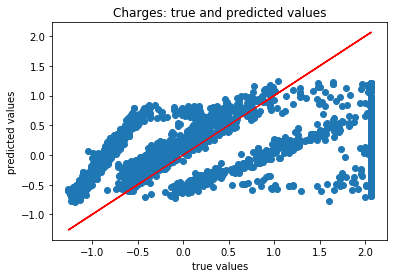

Mean absolute error of the prediction is: 0.6946866759484961
Mean squared error of the prediction is: 0.8050326106531047
Root mean squared error of the prediction is: 0.8972360952687451
Mean absolute percentage error of the prediction is: 425.86547729287145


In [90]:
# Make predictions.
y_preds = ols_results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [91]:
# Initializing and fitting the data to ridge regression model.
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

# Make predictions.
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 100.0
R-squared of the model in training set is: 0.21631710067114052
-----Test set statistics-----
R-squared of the model in test set is: 0.21675669462006275
Mean absolute error of the prediction is: 0.6984557157959392
Mean squared error of the prediction is: 0.8068547326049076
Root mean squared error of the prediction is: 0.8982509296432193
Mean absolute percentage error of the prediction is: 428.63129089786696


In [92]:
# 10 k-fold cross validation for ridge regression.
from sklearn import model_selection
seed = 7
kfold_rid = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(ridge_cv, X3, y3, cv=kfold_rid)
print(results)
print("Ridge Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.19563318 0.19912572 0.22218628 0.17767266 0.27458313 0.20059271
 0.23353618 0.22647916 0.17325577 0.2308345 ]
Ridge Regression K-Fold Accuracy 21.34 %


In [93]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.01
R-squared of the model in training set is: 0.2152215682268157
-----Test set statistics-----
R-squared of the model in test set is: 0.21502495905699703
Mean absolute error of the prediction is: 0.6988667846930348
Mean squared error of the prediction is: 0.8086386725697721
Root mean squared error of the prediction is: 0.899243388949717
Mean absolute percentage error of the prediction is: 427.1985342606331


In [94]:
# 10 k-fold cross validation for lasso regression.
from sklearn import model_selection
seed = 7
kfold_las = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(lasso_cv, X3, y3, cv=kfold_las)
print(results)
print("Lasso Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.19559766 0.19880372 0.21569632 0.17763557 0.27544062 0.2003693
 0.23154465 0.22707143 0.17252726 0.23125838]
Lasso Regression K-Fold Accuracy 21.26 %


In [95]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 0.01
R-squared of the model in training set is: 0.21581271471551655
-----Test set statistics-----
R-squared of the model in test set is: 0.2153799427592572
Mean absolute error of the prediction is: 0.6986801819045726
Mean squared error of the prediction is: 0.8082729876310066
Root mean squared error of the prediction is: 0.8990400367230631
Mean absolute percentage error of the prediction is: 428.38767668267224


In [96]:
# 10 k-fold cross validation for elasticnet regression.
from sklearn import model_selection
seed = 7
kfold_ela = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(elasticnet_cv, X3, y3, cv=kfold_ela)
print(results)
print("ElasticNet Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.19530661 0.1988386  0.21805187 0.17883369 0.27554248 0.20049177
 0.23345338 0.2270563  0.17256685 0.23117973]
ElasticNet Regression K-Fold Accuracy 21.31 %


In [97]:
# Predicting 'Customer Lifetime Value' with k-nearest neighbors regression.
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model.
knnr = KNeighborsRegressor(n_neighbors = 2) # n_neighbors means k

# Fit the model to the train set.
knnr.fit(X_train, y_train)

# Prediction.
y_pred = knnr.predict(X_test)

# Compare the test data with the data.
acc = knnr.score(X_test, y_test)*100

print("2 neighbors KNN Regression Score: ", round(acc, 2), "%")

2 neighbors KNN Regression Score:  3.53 %


In [98]:
# 10 k-fold cross validation for KNN regression.
from sklearn import model_selection
seed = 7
kfold_knnr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(knnr, X3, y3, cv=kfold_knnr)
print(results)
print("KNN Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[-0.02370661  0.06892774  0.08060918  0.00928538  0.07608111  0.03419423
  0.03013335  0.10852468 -0.00297927  0.12057109]
KNN Regression K-Fold Accuracy 5.02 %


In [99]:
# Predicting 'Customer Lifetime Value' with support vector machine regression.
from sklearn.svm import SVR
# Initialize the model.
svr = SVR()

# Fit the model to the train set.
svr.fit(X_train, y_train)

# Prediction.
y_pred = svr.predict(X_test)

# Compare the test data with the data.
acc = svr.score(X_test, y_test)*100

print("SVM Algorithm Test Accuracy", round(acc, 2), "%")


SVM Algorithm Test Accuracy 33.86 %


In [100]:
# 10 k-fold cross validation for support vector regression.
from sklearn import model_selection
seed = 7
kfold_svr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(svr, X3, y3, cv=kfold_svr)
print(results)
print("Support Vector Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.36162991 0.34616897 0.37357321 0.32403953 0.38423389 0.32026482
 0.37556531 0.3731718  0.30946484 0.37512678]
Support Vector Regression K-Fold Accuracy 35.43 %


In [101]:
# Predicting 'Response' with a decision tree classifier.
from sklearn.tree import DecisionTreeRegressor

# Initialize the model.
dtr = DecisionTreeRegressor()

# Fit the model to the train set. 
dtr.fit(X_train, y_train)

# Compare the test data with the data.
acc = dtr.score(X_test, y_test)*100

print("Decision Tree Regression Test Accuracy", round(acc, 2), "%")

Decision Tree Regression Test Accuracy 80.41 %


In [102]:
# 10 k-fold cross validation for decision tree regression.
from sklearn import model_selection
seed = 7
kfold_dtr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(dtr, X3, y3, cv=kfold_dtr)
print(results)
print("Decision Tree Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.76956239 0.80313917 0.80538903 0.80717625 0.82915847 0.78115445
 0.82027569 0.84653328 0.79604271 0.83411581]
Decision Tree Regression K-Fold Accuracy 80.93 %


In [103]:
# Predicting 'Customer Lifetime Value' with a random forest regression.
from sklearn.ensemble import RandomForestRegressor
# Initialize the model.
rfreg = RandomForestRegressor()

# Fit the model to the train set. 
rfreg.fit(X_train, y_train)

# Compare the test data with the data.
acc = rfreg.score(X_test, y_test)*100

print("Random Forest Regression Test Accuracy", round(acc, 2), "%")

Random Forest Regression Test Accuracy 88.74 %


In [104]:
# 10 k-fold cross validation for random forest regression.
from sklearn import model_selection
seed = 7
kfold_rfreg = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(rfreg, X3, y3, cv=kfold_rfreg)
print(results)
print("Random Forest Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.90509975 0.88222825 0.87401627 0.88539436 0.91103569 0.86182279
 0.89339137 0.91691787 0.87231565 0.91097804]
Random Forest Regression K-Fold Accuracy 89.13 %


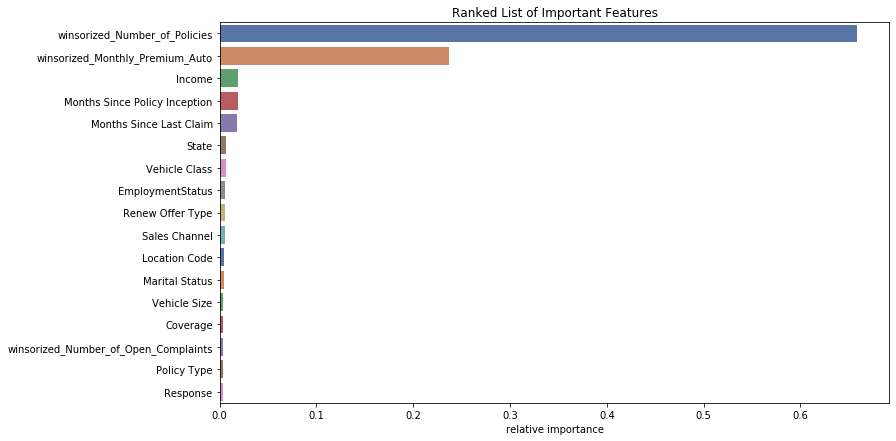

In [105]:
# List the importance of the features ranked.  
feature_imp_reg = rfreg.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp_reg, index=X3.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.title('Ranked List of Important Features')
plt.xlabel('relative importance')
plt.show()

In [106]:
# Predicting 'Customer Lifetime Value' with a XGBoost regression.
from xgboost import XGBRegressor

# Initialize the model.
xgbr = XGBRegressor()

# Fit the model to the train set. 
xgbr.fit(X_train, y_train)

# Compare the test data with the data.
acc = xgbr.score(X_test, y_test)*100

print("XGBoost Regression Test Accuracy", round(acc, 2), "%")

[12:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression Test Accuracy 88.73 %


In [107]:
# 10 k-fold cross validation for xgboost regression.
from sklearn import model_selection
seed = 7
kfold_xgbr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(xgbr, X3, y3, cv=kfold_xgbr)
print(results)
print("XGBoost Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[12:07:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:07:27] WARNI

In [115]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)
 

[12:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:17] WARNI

[12:23:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:30] WARNI

[12:23:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:44] WARNI

[12:23:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:58] WARNI

[12:24:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:12] WARNI

[12:24:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:26] WARNI

[12:24:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:39] WARNI

[12:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:24:55] WARNI

[12:25:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:07] WARNI

[12:25:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:23] WARNI

[12:25:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:36] WARNI

[12:25:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:25:51] WARNI

[12:26:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:06] WARNI

[12:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:21] WARNI

[12:26:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:37] WARNI

[12:26:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:26:51] WARNI

[12:27:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:08] WARNI

[12:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:22] WARNI

[12:27:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:39] WARNI

[12:27:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:27:53] WARNI

[12:28:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:11] WARNI

[12:28:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:28] WARNI

[12:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:28:44] WARNI

[12:29:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:02] WARNI

[12:29:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:19] WARNI

[12:29:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:38] WARNI

[12:29:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:29:54] WARNI

[12:30:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


NameError: name 'r2_score' is not defined

In [117]:
from sklearn.metrics import r2_score
# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test))) 

0.8886498390404841


After executing the grid search algorithm on xgboost regressor, the score did not increase, instead it decreased. 

# Conclusion

Before the modeling analysis, I thought linear regression would be the top model to use.  I didn't take into account the numeric variables graphed to CLV looked less linear.  The models related to linear regression were the worst performers with the dataset.  The best models were between random forest and xgboost regression.  I chose xgboost because it has a higher score of 89.09% with 10 fold cross validation and 88.73% with train and test split. 